In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Colab Notebooks/complaints.csv"
df = pd.read_csv(path)
df = df[["Product", "Consumer complaint narrative"]]
df = df.dropna()

<ipython-input-6-6330d8f44d4a>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [7]:
df = df[['Product', 'Consumer complaint narrative']]
df.columns = ['product', 'complaint']
df.dropna(inplace=True)

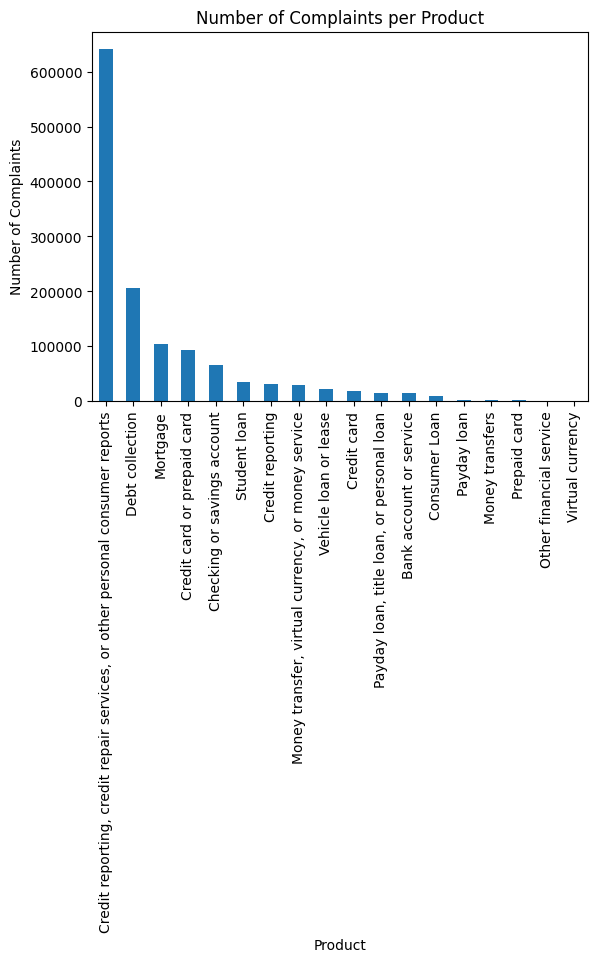

In [8]:
df['product'].value_counts().plot(kind='bar')
plt.title('Number of Complaints per Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()

In [9]:
df['complaint'] = df['complaint'].apply(lambda x: x.lower())

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['complaint'], df['product'], test_size=0.3, random_state=42)


In [11]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=42))
])

In [12]:
text_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])

In [13]:
y_pred = text_clf.predict(X_test)


In [14]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.29      0.39      4269
                                                 Checking or savings account       0.71      0.80      0.75     19686
                                                               Consumer Loan       0.49      0.12      0.20      2943
                                                                 Credit card       0.59      0.24      0.34      5619
                                                 Credit card or prepaid card       0.68      0.76      0.72     27659
                                                            Credit reporting       0.62      0.15      0.25      9458
Credit reporting, credit repair services, or other personal consumer reports       0.86      0.93      0.89    192819
                                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
